In [0]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns


In [0]:
#Read csv file and assign to a data frame
df = pd.read_csv("crime_rates.csv", usecols = ['State','Year','Population','Murder Rate'])
df.rename(columns = {'Murder Rate':'Murder_Rate'},inplace=True)
df.head()


In [85]:
df_dup = df[['State','Year','Murder_Rate']]
df_dup.head()

,State,Year,Murder_Rate
0,Alaska,1960,10.2
1,Alaska,1961,11.5
2,Alaska,1962,4.5
3,Alaska,1963,6.5
4,Alaska,1964,10.4


**Question 1.1**

What additional information will we need before we can check for that association?
Murder rates vary over time, and different states exhibit different trends. The rates in some states
change dramatically from year to year, while others are quite stable. Let's plot a couple, just to see the
variety.

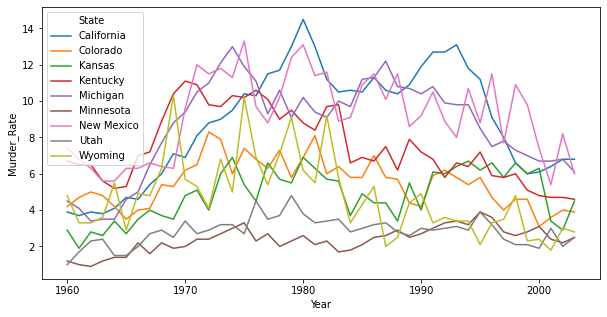

In [86]:
import random
States_list = df.State.unique().tolist()
random_states = random.sample(States_list,9)
df_plot = df.loc[df['State'].isin(random_states)]
df_plot.set_index('State',drop=True,inplace=True)
df_plot.head()
pl.figure(figsize=(10,5))
sns.lineplot(x="Year",y="Murder_Rate",hue=df_plot.index,data=df_plot)

**Question 1.2** 
Draw a line plot with years on the horizontal axis and murder rates on the vertical axis. Include two lines: one for Alaska murder rates and one for Minnesota murder rates. Create this plot using a single call, ak_mn.plot('Year').

In [87]:
year_list,ak_mr,mn_mr=[],[],[]
year_list = df.Year.unique().tolist()
ak_mr = df[df['State'] == 'Alaska'].Murder_Rate.tolist()
mn_mr = df[df['State'] == 'Minnesota'].Murder_Rate.tolist()
ak_mn = pd.DataFrame()
ak_mn['Year'] = year_list
ak_mn['Murder Rate in Alaska'] = ak_mr
ak_mn['Murder Rate in Minnesota'] = mn_mr
ak_mn.head()

,Year,Murder Rate in Alaska,Murder Rate in Minnesota
0,1960,10.2,1.2
1,1961,11.5,1.0
2,1962,4.5,0.9
3,1963,6.5,1.2
4,1964,10.4,1.4


Text(0, 0.5, 'Murder Rates\n')

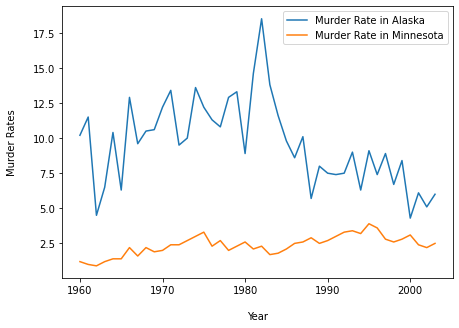

In [88]:
#Plot murder rates of Alaska and Minnesota
ak_mn.plot('Year')
pl.xlabel('\nYear')
pl.ylabel('Murder Rates\n')


**Question 1.3**
 Implement the function most_murderous, which takes a year (an integer) as its argument. 

It does two things:

1.It draws a horizontal bar chart of the 5 states that had the highest murder rate in that year.

2.It returns an array of the names of these states in order of increasing murder rate.


In [0]:
def most_murderous(year):
  sp=df.loc[df['Year'] == year] 
  most_murders = sp.nlargest(5,['Murder_Rate'])
  most_murders.set_index('State',inplace=True)
  #Using Seaborn to plot bar graph 
  sns.set_context({"figure.figsize": (7, 5)})
  most_murders.sort_values(by=['Murder_Rate'],ascending=False,inplace=True)
  ax = sns.barplot(x="Murder_Rate",y=most_murders.index,data=most_murders,orient="h")
  pl.title('\n\nHighest murder rates\n')  
  most_murders.sort_values(by=['Murder_Rate'],inplace=True)
  States = most_murders.index.tolist()
  return States

['California', 'Alabama', 'Arkansas', 'Mississippi', 'Louisiana']

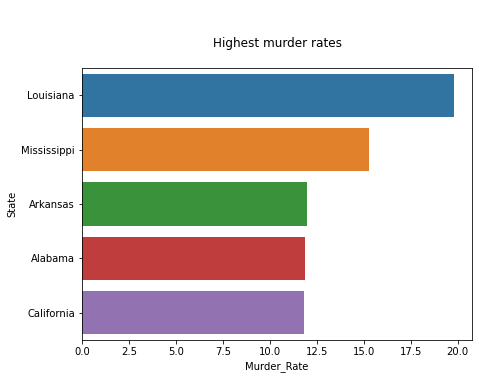

In [90]:
most_murderous(1994)


**Question 1.4**

 How many more people were murdered in California in 1988 than in 1975? Assign ca_change to the answer.

Hint: Consider using the formula in the beginning of the section to answer this question.

murder rate for state X in year Y = 100000 * (number of murders in state X in year Y /
population in state X in year Y)

In [91]:
ca=df[df['State'] == 'California']
ca_df = ca.loc[ca['Year'].isin([1988,1975])]
ca_value=round(((ca_df.loc[ca_df['Year'] == 1988, 'Murder_Rate'].iloc[0]) * (ca_df.loc[ca_df['Year'] == 1988, 'Population'].iloc[0]))/100000)
ca_value1=round(((ca_df.loc[ca_df['Year'] == 1975, 'Murder_Rate'].iloc[0]) * (ca_df.loc[ca_df['Year'] == 1975, 'Population'].iloc[0]))/100000)
ca_change = ca_value - ca_value1
print("Increase in murder rate in California from 1988 to 1975 is:",ca_change)

Increase in murder rate in California from 1988 to 1975 is: 726.0


**Question 2.1**

Implement the function two_year_changes that takes an array of murder rates for a state,
ordered by increasing year. For all two-year periods (e.g., from 1960 to 1962), it computes and returns
the number of increases minus the number of decreases.

We can use two_year_changes to summarize whether rates are mostly increasing or decreasing over
time for some state or group of states. Let's see how it varies across the 50 US states.

In [0]:
def two_year_changes(rates):
  rate_increase=0
  rate_decrease=0
  for a,b in zip(rates[0::],rates[2::]):
    rate_diff = b-a
    if(rate_diff > 0):
        rate_increase = rate_increase + 1
    elif(rate_diff < 0):
        rate_decrease = rate_decrease + 1
  return (rate_increase - rate_decrease)

In [93]:
rates_list=[]
two_year_rates=[]
for i in range(len(States_list)):
  rates_list=list(df[df['State']==States_list[i]].Murder_Rate)
  two_year_rates.append(two_year_changes(rates_list))

df_state_rates = pd.DataFrame()  
df_state_rates['States']=States_list
df_state_rates['Rates']=two_year_rates
df_state_rates.head()


,States,Rates
0,Alaska,-5
1,Alabama,-6
2,Arkansas,-1
3,Arizona,1
4,California,17


**Question 2.2**

Assign changes_by_state to a table with one row per state that has two columns: the
State name and the Murder Rate two_year_changes statistic computed across all years in our data set
for that state.

In [94]:
changes_by_state = df_state_rates
changes_by_state

,States,Rates
0,Alaska,-5
1,Alabama,-6
2,Arkansas,-1
3,Arizona,1
4,California,17
5,Colorado,-4
6,Connecticut,4
7,Delaware,-3
8,Florida,-6
9,Georgia,-3


**Question 2.3**

Assign total_changes to the total increases minus the total decreases for all two-year
periods and all states in our data set.

In [95]:
rateslist = []
total_increase = []
total_decrease = []
rateslist = changes_by_state.Rates.tolist()
for i in range(len(rateslist)):
  if rateslist[i] > 0:
    total_increase.append(rateslist[i])
  elif rateslist[i] < 0:
    total_decrease.append(rateslist[i])
total_changes = (sum(total_increase) - (abs(sum(total_decrease))))
print('Total increases minus total decreases across all states and years:', total_changes)


Total increases minus total decreases across all states and years: 45


**Question 2.4** 

Set num_changes to the number of different two-year periods in the entire data set that could result in a change of a state's murder rate. Include both those periods where a change occurred and the periods where a state's rate happened to stay the same.




In [96]:
i=0
num_periods_list = []
for i in range(len(States_list)):
  num_periods_value = (df[df['State']==States_list[i]]).shape[0] - 2
  num_periods_list.append(num_periods_value)
num_changes = sum(num_periods_list)
print("Number of two_year_periods in the data set:",num_changes)

Number of two_year_periods in the data set: 2100


We now have enough information to perform a hypothesis test.

**Null Hypothesis:** State murder rates increase and decrease over two-year periods as if "increase" or "decrease" were sampled at random from a uniform distribution, like a fair coin flip.

Since it's possible that murder rates are more likely to go up or more likely to go down, our alternative hypothesis should contemplate either case:

**Alternative Hypothesis:** State murder rates are either more likely or less likely to increase than decrease over two-year periods.

Technical note: These changes in murder rates are not random samples from any population. They describe all murders in all states over all recent years. However, we can imagine that history could have been different, and that the observed changes are the values observed in only one possible world: the one that happened to occur. In this sense, we can evaluate whether the observed "total increases minus total decreases" is consistent with a hypothesis that increases and decreases are drawn at random from
a uniform distribution.

**Question 2.5**

Given these null and alternative hypotheses, define a good test statistic.



In [97]:
sample = [['Increase',0.5],['Decrease',0.5]]
sample_df = pd.DataFrame(sample, columns=['Change','Chance'])
x = random.randint(1,100)
sample_df['Chance_Sample'] = [x,(100-x)]
sample_df


,Change,Chance,Chance_Sample
0,Increase,0.5,22
1,Decrease,0.5,78



**Question 2.6**

Complete the simulation below, which samples num_changes increases/decreases at random many times and forms an empirical distribution of your test statistic under the null hypothesis. Your job is to

 fill in the function simulate_under_null, which simulates a single sample under the null hypothesis, and
 
fill in its argument when it's called below.

In [0]:
def simulate_under_null(num_change):
  states_sample,rate_sample_list,res_list,rates_increase_list,rates_decrease_list = [],[],[],[],[]
  sample_df1 = df.sample(num_change)
  states_sample = sample_df1.State.unique()
  for state in states_sample:
    rate_sample_list=list(sample_df1[sample_df1['State']==state].Murder_Rate)
    res_list.append(two_year_changes(rate_sample_list))
  for i in range(len(res_list)):
    if res_list[i] > 0:
       rates_increase_list.append(res_list[i])
    elif res_list[i] < 0:
       rates_decrease_list.append(res_list[i])
  total_change_in_sample = (len(rates_increase_list) - len(rates_decrease_list))
  return total_change_in_sample

In [99]:
simulation_result = []
no_of_simulations = 5000
for i in range(no_of_simulations):
  simulation_result.append(simulate_under_null(num_changes))
simulation_df = pd.DataFrame(simulation_result,columns=['Test Statistic Under Null'])
simulation_df

,Test Statistic Under Null
0,-1
1,-1
2,-10
3,14
4,-3
...,...
4995,-4
4996,2
4997,-2
4998,5


**Question 2.7** 

Looking at this histogram, draw a conclusion about whether murder rates basically increase as often as they decrease.

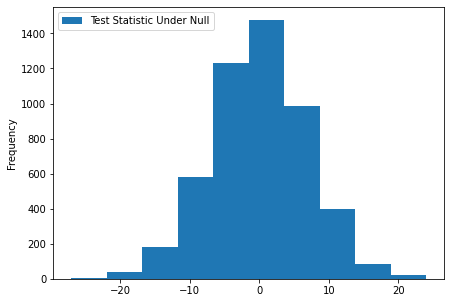

In [101]:
simulation_df.plot.hist()

**Question 3.3**

Assign death_penalty_murder_rates to a table with the same columns and data as
murder rates, but that has only the rows for states that had the death penalty in 1971.

In [102]:
no_death_penalty_states = ['Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota']
def death_penalty_before_1972(State):
  if State in (no_death_penalty_states):
    return False
  else:
    return True
death_penalty = []
for state in States_list:
  death_penalty.append(death_penalty_before_1972(state))

states_df = pd.DataFrame(States_list, columns = ['State'])
states_df['Death Penalty'] = death_penalty
states_df


,State,Death Penalty
0,Alaska,False
1,Alabama,True
2,Arkansas,True
3,Arizona,True
4,California,True
5,Colorado,True
6,Connecticut,True
7,Delaware,True
8,Florida,True
9,Georgia,True


In [103]:
df_dp = df[['State','Year','Population','Murder_Rate']]
df_dp.drop(df_dp[df_dp['State'].isin(no_death_penalty_states)].index, inplace = True) 
death_penalty_murder_rates = df_dp
death_penalty_murder_rates

,State,Year,Population,Murder_Rate
44,Alabama,1960,3266740,12.4
45,Alabama,1961,3302000,12.9
46,Alabama,1962,3358000,9.4
47,Alabama,1963,3347000,10.2
48,Alabama,1964,3407000,9.3
...,...,...,...,...
2195,Wyoming,1999,480000,2.3
2196,Wyoming,2000,493782,2.4
2197,Wyoming,2001,494423,1.8
2198,Wyoming,2002,498830,3.0


**Question 3.4** 

Assign changes_72 to the value of the test statistic for the years 1971 to 1973 and the states in death_penalty_ murder_rates.

In [104]:
years = [1971, 1973]
changes_72_list = []
changes_72_value = 0
states_death_penalty = []
death_penalty_murder_rates_72 = death_penalty_murder_rates[death_penalty_murder_rates['Year'].isin(years)]
states_death_penalty = death_penalty_murder_rates_72.State.unique()
for state in states_death_penalty:
  changes_72_value = (death_penalty_murder_rates_72.loc[death_penalty_murder_rates['State']==state,'Murder_Rate'].iloc[1] - death_penalty_murder_rates_72.loc[death_penalty_murder_rates['State']==state,'Murder_Rate'].iloc[0])
  changes_72_list.append(changes_72_value)

changes_72_df = pd.DataFrame()
changes_72_df['State'] = states_death_penalty
changes_72_df['Murder_rate'] = changes_72_list
changes_72_df

,State,Murder_rate
0,Alabama,-1.900001
1,Arkansas,-1.700000
2,Arizona,1.400001
3,California,0.900000
4,Colorado,1.400000
5,Connecticut,0.200000
6,Delaware,-0.200000
7,Florida,2.099999
8,Georgia,1.400000
9,Iowa,0.400000


In [105]:
rate_inc,rate_dec = [],[]
changes_72_df = 0
for val in changes_72_list:
  if val > 0:
    rate_inc.append(val)
  elif val < 0:
    rate_dec.append(val)
changes_72_df = (len(rate_inc) - len(rate_dec))
print('Total Increases minus total decreases from 1971 to 1973:', changes_72_df)

Total Increases minus total decreases from 1971 to 1973: 22


**Question 3.5** 

Draw an empirical histogram of the statistic under the null hypothesis by simulating the test statistic 5,000 times.

In [106]:
death_penalty_murder_rates_1973 = death_penalty_murder_rates[death_penalty_murder_rates['Year'] == 1973]
death_penalty_murder_rates_1971 = death_penalty_murder_rates[death_penalty_murder_rates['Year'] == 1971]
murder_rates_1973,murder_rates_1971 = [],[]
murder_rates_1973 = death_penalty_murder_rates_1973.Murder_Rate.tolist()
murder_rates_1971 = death_penalty_murder_rates_1971.Murder_Rate.tolist()
death_penalty_diff_murder_rates = pd.DataFrame()
death_penalty_diff_murder_rates['States'] = states_death_penalty
death_penalty_diff_murder_rates['Murder_rate_in_1973'] = murder_rates_1973
death_penalty_diff_murder_rates['Murder_rate_in_1971'] = murder_rates_1971
death_penalty_diff_murder_rates['diff_murder_rates'] = death_penalty_diff_murder_rates['Murder_rate_in_1973'] - death_penalty_diff_murder_rates['Murder_rate_in_1971'] 
death_penalty_diff_murder_rates


,States,Murder_rate_in_1973,Murder_rate_in_1971,diff_murder_rates
0,Alabama,13.2,15.1,-1.900001
1,Arkansas,8.8,10.5,-1.700000
2,Arizona,8.1,6.7,1.400001
3,California,9.0,8.1,0.900000
4,Colorado,7.9,6.5,1.400000
5,Connecticut,3.3,3.1,0.200000
6,Delaware,5.9,6.1,-0.200000
7,Florida,15.4,13.3,2.099999
8,Georgia,17.4,16.0,1.400000
9,Iowa,2.2,1.8,0.400000


In [0]:
def simulation_death_penalty(no_of_simulations):
  samples_diff_murder_rates,changes_diff = [],[]
  for i in range(no_of_simulations):
    diff_increase,diff_decrease = [],[]
    random_sample = random.randint(1,44)
    sample_death_penalty_df = death_penalty_diff_murder_rates.sample(random_sample)
    samples_diff_murder_rates = sample_death_penalty_df.diff_murder_rates.tolist()
    for sample_diff in samples_diff_murder_rates:
      if sample_diff > 0:
        diff_increase.append(sample_diff)
      elif sample_diff < 0:
        diff_decrease.append(sample_diff)
    changes_diff.append(len(diff_increase) - len(diff_decrease))
  return changes_diff


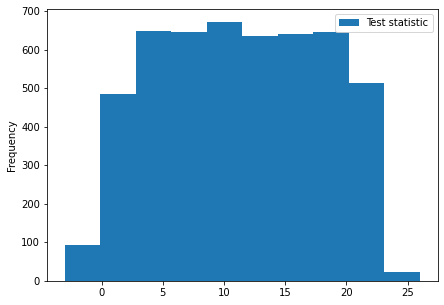

In [108]:
number_of_simulations = 5000
sim_diff_result = simulation_death_penalty(number_of_simulations)
simulation_dict = {'Test statistic':sim_diff_result}
simulation_diff_data = pd.DataFrame(simulation_dict)
simulation_diff_data.plot.hist()

In [109]:
no_of_diff = simulation_diff_data[simulation_diff_data['Test statistic'] >= 22]
column_count = no_of_diff.count()
print("P Value:", column_count/5000)

P Value: Test statistic    0.0612
dtype: float64


**Question 4.1** 

Implement run test, which takes the following arguments:

* A table of murder rates for certain states, sorted by state and year like 
murder rates, and

* The year when the analysis starts. (The comparison group is two years later.)

It prints out the observed test statistic and returns the P-value for this statistic under the null hypothesis.

In [0]:
def run_test(murder_rates_year, start_year):
  yearl,state_list_rate_year,diff_rate_value_list,test_statistic = [],[],[],[]
  observed_statistic = 0
  p_value = 0
  greater_than_test_statistic = 0
  less_than_test_statistic = 0
  no_of_simltns = 5000
  end_year = start_year + 2
  yearl = [start_year, end_year]
  # murder_rates_year.drop(columns = 'Population', inplace=True)
  murder_rates_year = murder_rates_year[murder_rates_year['Year'].isin(yearl)]
  state_list_rate_year = murder_rates_year.State.unique().tolist()
  for state1 in state_list_rate_year:
    diff_rate_value = (murder_rates_year.loc[murder_rates_year['State']==state1,'Murder_Rate'].iloc[1] - murder_rates_year.loc[murder_rates_year['State']==state1,'Murder_Rate'].iloc[0])
    diff_rate_value_list.append(diff_rate_value)
  state_list_rate_year_df = pd.DataFrame()
  state_list_rate_year_df['State'] = state_list_rate_year
  state_list_rate_year_df['diff_in_murder_rates'] = diff_rate_value_list
  observed_statistic = len(state_list_rate_year_df.loc[state_list_rate_year_df.diff_in_murder_rates > 0]) - len(state_list_rate_year_df.loc[state_list_rate_year_df.diff_in_murder_rates < 0])
  print('Test statistic of', start_year, 'to', end_year, ':',observed_statistic)

  for i in range(no_of_simltns):
    sample_df_state_diffrates_df = state_list_rate_year_df.sample(random.randint(1,len(state_list_rate_year)))
    test_statistic.append(len(sample_df_state_diffrates_df.loc[sample_df_state_diffrates_df.diff_in_murder_rates > 0]) - len(sample_df_state_diffrates_df.loc[sample_df_state_diffrates_df.diff_in_murder_rates < 0]))
  print("No.of Test statistic for simulations:",len(test_statistic))
    
  greater_than_test_statistic = len(list(filter(lambda x : (x > observed_statistic), test_statistic)))
  less_than_test_statistic = len(list(filter(lambda x : (x < observed_statistic), test_statistic)))

  if observed_statistic > 0:
            p_value = greater_than_test_statistic/no_of_simltns
  elif observed_statistic < 0:
            p_value = less_than_test_statistic/no_of_simltns

  print("P value:",p_value)



In [113]:
run_test(df, 1998)

Test statistic of 1998 to 2000 : -35
No.of Test statistic for simulations: 5000
P value: 0.0056


**Question 5.1**

Create a table called average murder rates with 1 row for each year in murder rates. It
should have 3 columns:
* Year, the year,
* Death penalty states, the average murder rate of the states that had the death penalty in 1971,
and
* No death penalty states, the average murder rate of the other states.
average murder rates should be sorted in increasing order by year.

In [114]:
states_with_death_penalty,states_without_death_penalty,avg_mr_with_deathpenalty,avg_mr_with_no_deathpenalty = [],[],[],[]
states_with_death_penalty = states_df[states_df['Death Penalty'] == True].State.tolist()
states_without_death_penalty = states_df[states_df['Death Penalty'] == False].State.tolist()
avg_mur_rate = df_dup
yearval=avg_mur_rate.Year.unique()
for year in yearval:
     avg_mr_with_deathpenalty.append(avg_mur_rate[(avg_mur_rate['Year']==year)&(avg_mur_rate['State'].isin(states_with_death_penalty))].Murder_Rate.mean())
     avg_mr_with_no_deathpenalty.append(avg_mur_rate[(avg_mur_rate['Year']==year)&(avg_mur_rate['State'].isin(states_without_death_penalty))].Murder_Rate.mean())
average_murder_rates=pd.DataFrame()
average_murder_rates['Year']=yearval
average_murder_rates['Average Murder Rate of Death penalty states']=avg_mr_with_deathpenalty
average_murder_rates['Average Murder Rate of No Death penalty states']=avg_mr_with_no_deathpenalty
average_murder_rates

,Year,Average Murder Rate of Death penalty states,Average Murder Rate of No Death penalty states
0,1960,5.279545,3.550000
1,1961,4.777273,3.683333
2,1962,4.615909,2.333333
3,1963,4.613636,2.750000
4,1964,4.711364,3.400000
5,1965,4.827273,3.183333
6,1966,5.431818,4.516667
7,1967,5.875000,3.733333
8,1968,6.270455,4.733333
9,1969,6.502273,4.733333


**Question 5.2** 

Describe in one short sentence a high-level takeaway from the line plot below. Are the
murder rates in these two groups of states related? average murder rates.plot('Year').

Text(0, 0.5, 'Murder Rates')

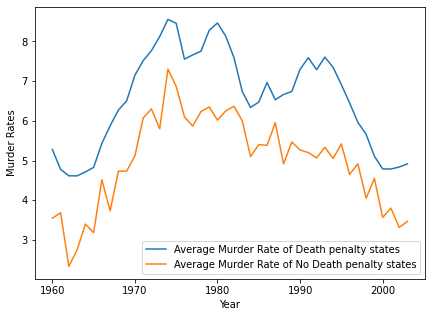

In [115]:
average_murder_rates.plot('Year')
pl.xlabel('Year')
pl.ylabel('Murder Rates')
